This is a simple example on how you can use a jupyter notebook to train your model :) 

In [1]:
import torch
import torch.nn as nn
import utils
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots

In [2]:
class Task2Model(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()

        # TODO: Implement this function (Task  2a)
        num_filters = 32  # Set number of filters in first conv layer
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            # [in: 3, out 32, input spatial size: 32x32, output spatial size: 16x16]
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=5,
                stride=1,
                padding=2
                ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
                ),
            # [in: 32, out 64, input spatial size: 16x16, output spatial size: 8x8]
            nn.Conv2d(
                in_channels=num_filters,
                out_channels=num_filters * 2,
                kernel_size=5,
                stride=1,
                padding=2
                ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
                ),
            # [in: 64, out 128, input spatial size: 8x8, output spatial size: 4x4]
            nn.Conv2d(
                in_channels=num_filters*2,
                out_channels=num_filters*4,
                kernel_size=5,
                stride=1,
                padding=2
                ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            ),
            nn.Flatten()

        )
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        #self.num_output_features = 32*32*32
        #self.num_output_features = 32 * 16 * 16
        self.num_output_features = 128 * 4 * 4
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            nn.Linear(in_features=self.num_output_features, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=num_classes),

        )

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        # TODO: Implement this function (Task  2a)
        x = self.feature_extractor(x)
        x = self.classifier(x)
        batch_size = x.shape[0]
        out = x
        #print(out.shape)
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out


Files already downloaded and verified
Files already downloaded and verified
Task2Model(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 67.16, Global step:    351, Validation Loss: 1.69, Validation Accuracy: 0.380
Epoch: 0, Batches per sec

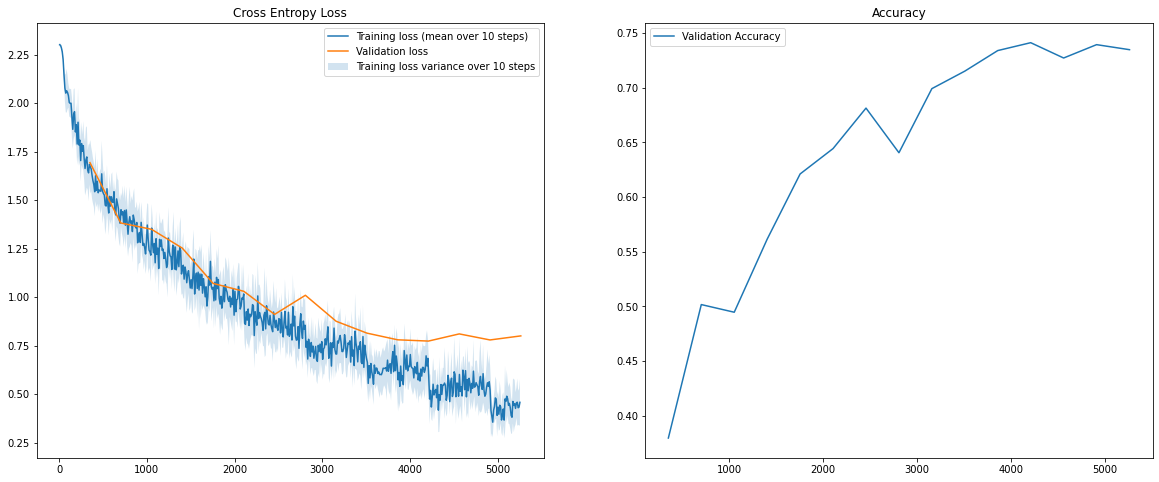

Task2Model(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Performance for best model:
train loss,  0.4837
train accuracy:  0.8364
validation loss:  0.7745
validation accuracy:  0.741
test_loss:  0.782
test_accuracy:  0.7285


In [3]:
    # Set the random generator seed (parameters, shuffling etc).
    # You can try to change this and check if you still get the same result! 
    utils.set_seed(0)
    epochs = 10
    batch_size = 64
    learning_rate = 5e-2
    early_stop_count = 4
    dataloaders = load_cifar10(batch_size)
    model = Task2Model(image_channels=3, num_classes=10)
    trainer = Trainer(
        batch_size,
        learning_rate,
        early_stop_count,
        epochs,
        model,
        dataloaders
    )
    trainer.train()
    create_plots(trainer, "task2")

    #Loading best model and plotting train, val, test accuracy
    trainer.load_best_model()
    print(trainer.model)
    train_loss, train_acc = compute_loss_and_accuracy(
        dataloaders[0], trainer.model, loss_criterion=nn.CrossEntropyLoss()
    )
    val_loss, val_acc = compute_loss_and_accuracy(
        dataloaders[1], trainer.model, loss_criterion=nn.CrossEntropyLoss()
    )

    test_loss, test_accuracy = compute_loss_and_accuracy(
        dataloaders[2], trainer.model, loss_criterion=nn.CrossEntropyLoss()
    )
    print('Performance for best model:')
    print('train loss, ', train_loss)
    print('train accuracy: ', train_acc)
    print('validation loss: ', val_loss)
    print('validation accuracy: ', val_acc)
    print('test_loss: ', test_loss)
    print('test_accuracy: ', test_accuracy)
